In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import warnings
from warnings import filterwarnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('X_train_KNN_balanced.csv')

In [3]:
data.head()

,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,GCS_first,...,PaO2_last,Platelets_last,SysABP_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,0,65,1.0,170.20,73.7,0,1,0,45.0,3.0,...,80.0,92.0,122.0,10.70,73.40,7.410,147.0,352.0,0.0,7.0
1,0,41,1.0,166.64,71.8,0,0,1,55.2,15.0,...,123.8,238.0,126.4,6.00,81.64,7.464,519.8,1661.0,0.4,10.6
2,1,67,1.0,182.90,65.0,0,0,1,53.0,3.0,...,125.0,27.0,96.0,14.30,81.64,7.380,463.0,2340.0,1.0,17.0
3,0,77,0.0,171.70,58.0,1,0,0,70.0,3.0,...,95.0,251.0,108.0,8.60,58.00,7.460,131.0,2378.0,1.0,14.0
4,0,59,1.0,177.80,127.3,0,1,0,66.0,11.0,...,73.0,142.0,138.0,8.72,127.30,7.430,118.0,1635.0,0.0,10.0


In [4]:
X = data.drop('In-hospital_death', axis=1)
y = data['In-hospital_death']
y.value_counts()

0    2239
1     361
Name: In-hospital_death, dtype: int64

In [5]:
data_test = pd.read_csv('X_test_KNN_balanced.csv')
y_test = pd.read_csv('y_test.csv')


In [6]:
tl = RandomOverSampler(sampling_strategy='auto')
X_train, y_train = tl.fit_resample(X, y)
#X_train, y_train = X, y
y_train.value_counts()

1    2239
0    2239
Name: In-hospital_death, dtype: int64

In [7]:
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
pickle.dump(minmax_scale, open('minmax_scale.pkl', 'wb'))

In [8]:
minmax_scale = pickle.load(open('minmax_scale.pkl', 'rb'))
X_test = minmax_scale.transform(data_test)

In [9]:
# grid = dict()
# grid['n_estimators'] = [10, 50, 100]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# adaboost = AdaBoostClassifier()
# adaboost = GridSearchCV(estimator=adaboost, param_grid=grid, cv=cv, scoring='accuracy')
# adaboost.fit(X_train, y_train)
# pickle.dump(adaboost, open('adaboost.pkl', 'wb'))
# adaboost.score(X_train, y_train), adaboost.score(X_test, y_test)

In [10]:
#model = AdaBoostClassifier(n_estimators=130,learning_rate = 1, random_state=42)
# model = KNeighborsClassifier(2)
#model = GaussianNB()
# model = SVC(kernel="linear", C=1, probability=True)
model =  MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [11]:

model.fit(X_train, y_train)
pickle.dump(model, open('adaboost.pkl', 'wb'))
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8142027690933452, 0.7953846153846154)

In [12]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       560
           1       0.37      0.71      0.49        90

    accuracy                           0.80       650
   macro avg       0.66      0.76      0.68       650
weighted avg       0.87      0.80      0.82       650



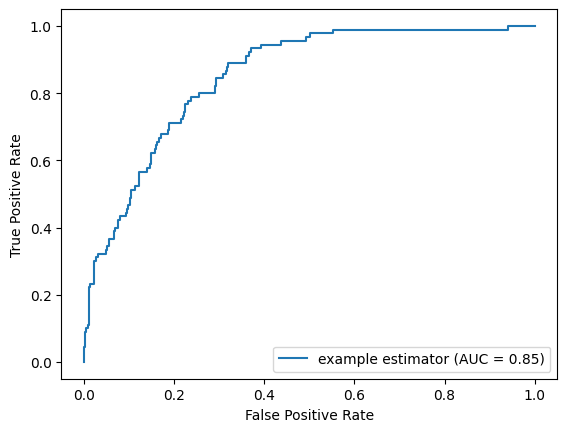

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [14]:
model = pickle.load(open('adaboost.pkl', 'rb'))
#pred = model.predict(X_test)
pred = model.predict_proba(X_test)

In [15]:
pred = model.predict_proba(X_test)
pred = (pred[:, 1] > 0.498).astype(int)
print(classification_report(y_test, pred))

con = confusion_matrix(y_test, pred)
con = confusion_matrix(y_test, pred)

con

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       560
           1       0.37      0.71      0.49        90

    accuracy                           0.80       650
   macro avg       0.66      0.76      0.68       650
weighted avg       0.87      0.80      0.82       650



array([[453, 107],
       [ 26,  64]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

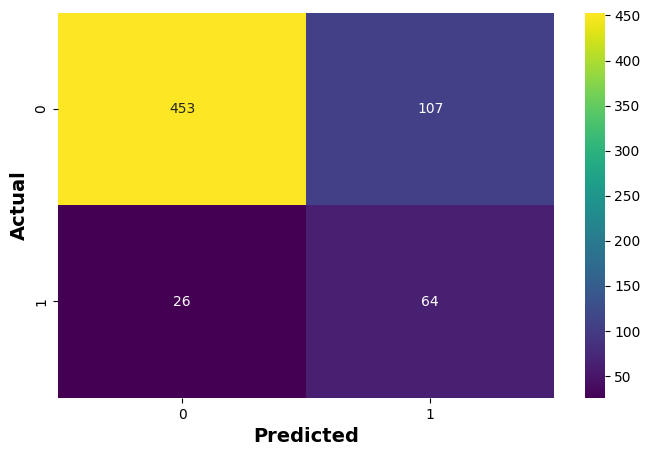

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(con, annot=True, cmap='viridis', fmt='.0f');
plt.xlabel('Predicted', fontsize=14, weight='bold')
plt.ylabel('Actual', fontsize=14, weight='bold')

In [17]:
import json

ada_prob = model.predict_proba(X_test)[:,1]

# Data to be written
dictionary = {'predict_probas':list(ada_prob), 'threshold':0.5}
# Serializing json
json_object = json.dumps(dictionary, indent=2)
# Writing to sample.json
with open("predictions.json", "w") as outfile:
    outfile.write(json_object)

In [18]:
confusion_matrix=confusion_matrix(y_test,pred)

In [19]:


sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])


specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])


fpr, tpr, thresholds_roc = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)



ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
#print('ppv : ', ppv )

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
#print('npv : ', npv)
print('accuracy',model.score(X_test, y_test))
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('auc',roc_auc)
print('mcc', matthews_corrcoef(y_test, pred))

accuracy 0.7953846153846154
Sensitivity :  0.9457202505219207
Specificity :  0.3742690058479532
auc 0.7600198412698413
mcc 0.4079302774969006


auc 0.7600198412698413
mcc 0.4079302774969006


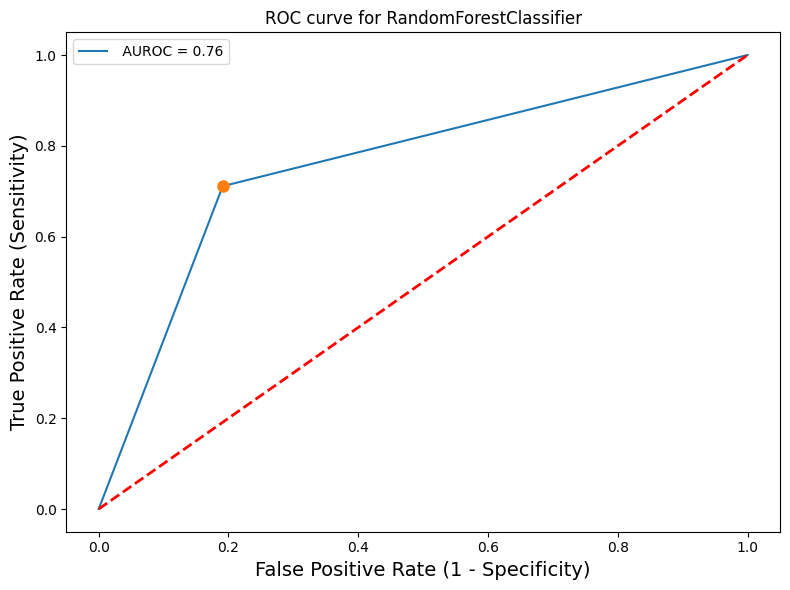

In [20]:

from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
print('auc',roc_auc)
print('mcc', matthews_corrcoef(y_test, pred))
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()